In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import tree
import matplotlib.pyplot as plt


In [5]:
df_org = pd.read_csv('data/Social_Network_AdsYesNo.csv')

In [6]:
#Categorical data - One hot Encoding
df=pd.get_dummies(data=df_org, columns=['Gender'])


In [7]:
#Prepare data (X) and label (y)
X = df.drop(['User ID','Purchased'],axis=1)
y = df['Purchased']
X = X.to_numpy()
y = y.to_numpy()

In [8]:
#Separate data : Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
#Create model
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

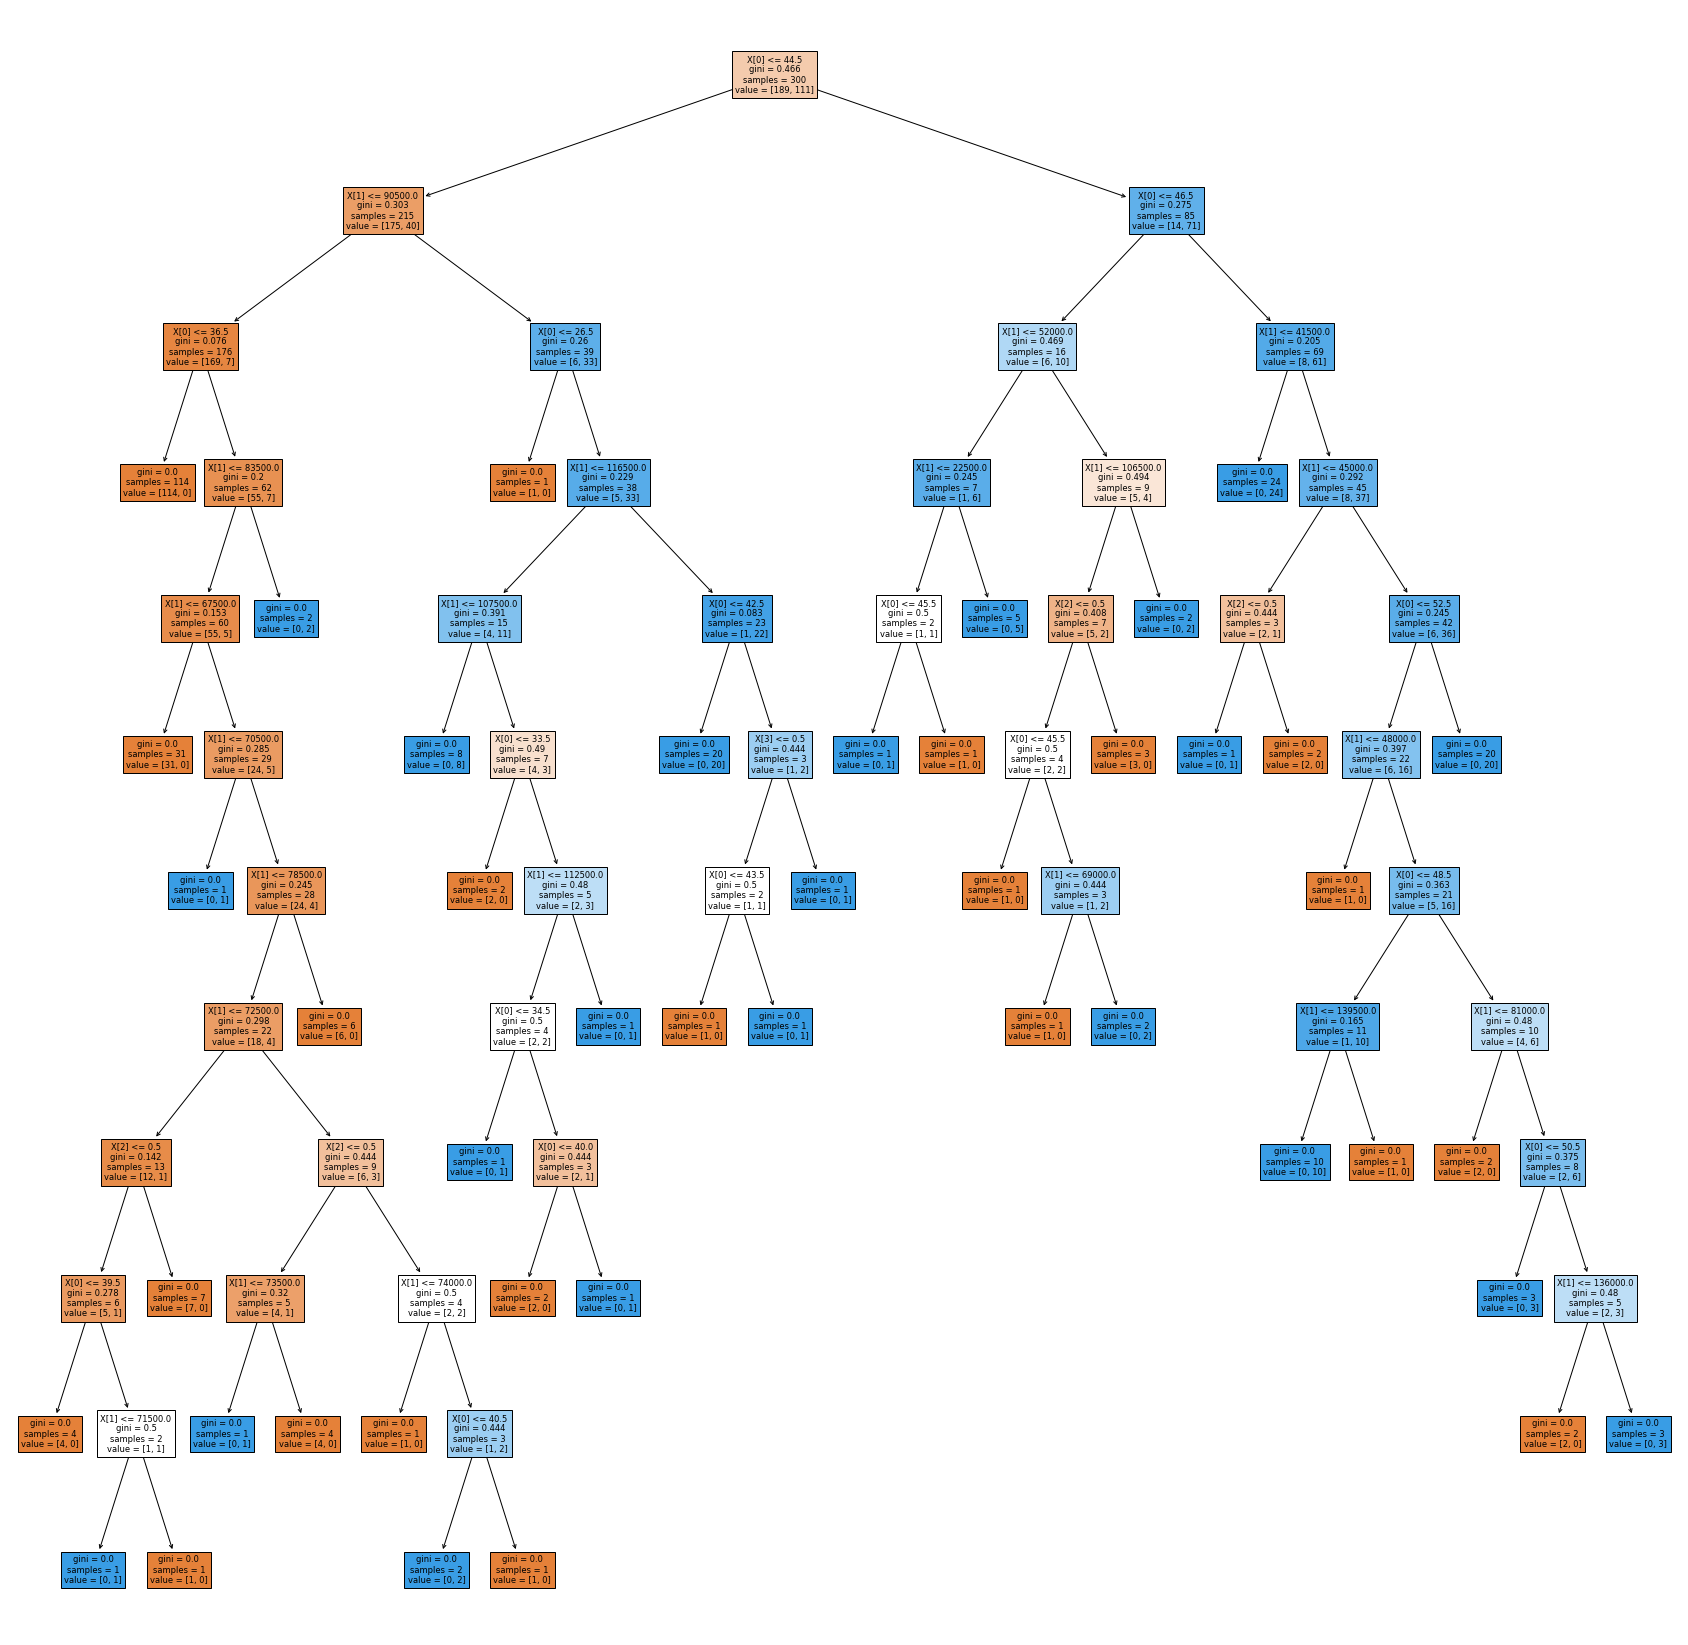

In [10]:
#Display tree
plt.figure(figsize=(30, 30))
tree.plot_tree(classifier,filled=True)
plt.savefig('model-tree.png')

In [11]:
#Prediction
# xtest = sc_x.transform(X_test)
y_pred = classifier.predict(X_test)


In [12]:
#Display as table to compare actual vs. predicted 
tab = pd.DataFrame()
tab['actual'] = y_test
tab['predict'] = y_pred

In [13]:
#Evaluation
cm = confusion_matrix(y_test, y_pred)
eval_report = classification_report(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ("Summary : \n", eval_report)

Confusion Matrix : 
 [[62  6]
 [ 4 28]]
Summary : 
               precision    recall  f1-score   support

          No       0.94      0.91      0.93        68
         Yes       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

